# Exercise 4: Wind-generated set-up and circulations in a homogeneous lake

Wind over a lake can generate a water level set-up and drive both horizontal and vertical circulations. In this exercise we study set-up and circulations in a lake with uniform density. We investigate the effects of depth variation, and consider consequences of modelling this situation in either 2DH or 3D.

The lake covers an area of 10 km by 10 km and is 5 m deep. The westerly wind blows steadily with $U_{10}$ = 10.0 m/s.

## 4.2)  Wind over lake with non-uniform depth (2DH)

a)	For shipping purposes, a channel is dredged through the lake (depth 10 m, width 1 km). This has been included in the model schematization used next. Run the model and investigate the water levels and flow velocities for the new situation.

b)	Why is the (depth-averaged) flow in the channel directed against the wind? Try to explain this from the balance between wind stress and pressure gradient.

c)	Estimate the magnitude of the bottom shear stress $\tau_{b,x}$ in the channel, using the formula below. Does it play a role in the balance of forces?

$\tau_{b,x} = \rho_{w} c_f \sqrt{U^2 + V^2} U$

with

$\rho_w$ = 1000 gm/m$^3$

$c_f$ = 4 x 10$^{-3}$

In [1]:
# Imports
import bmi.wrapper
import ipywidgets as widgets
from ipywidgets import HBox, VBox, interactive, Layout, interact
import numpy as np
import time
import os
# Something very fishy happening if I don't define a plot first.
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
plt.ioff()
_ = plt.figure()
plt.ion()

# Toggle button for hiding the raw code
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [2]:
import sys
import pathlib
fmdir = r'D:\oss_artifacts_x64_63463\x64\dflowfm\bin'
mdufile = r'D:\hydrodynamics-course-binder\PAO Models\Lake\w2.mdu'

In [3]:
engine = 'dflowfm.dll'
enginepath = os.path.join(fmdir, engine)
epath = pathlib.Path(enginepath)
epath.exists()
wrapper = bmi.wrapper.BMIWrapper(engine=str(epath), configfile=mdufile)

In [4]:
data = []
items = []
# wrapper = bmi.wrapper.BMIWrapper(engine=engine, configfile=mdufile);
wrapper.initialize();
# wrapper.update()

In [5]:
# for i in range(wrapper.get_var_count()):
#     print(wrapper.get_var_name(i), wrapper.get_var_shape(wrapper.get_var_name(i)))

In [6]:
# x = wrapper.get_var("xz")
# y = wrapper.get_var("yz")
# plt.figure()
# plt.plot(x, y)

In [7]:
maxsteps = 100
parameters = []
parameters = [
    {
        "parameter": "wx",
        "description": "Wind velocity $[m/s]$",
        "default": 15
    }
]

In [8]:
# Create widgets
style = {'description_width': 'initial'}

run = widgets.Button(
    description='Run model',
    button_style='',
    icon='play'
)
update = widgets.Button(
    description='Single update',
    button_style='',
    tooltip='Update with 1 timestep',
    icon='step-forward'
)
restart = widgets.Button(
    description='Restart model',
    button_style='',
    tooltip='Restart entire model with initial inputs',
    icon='retweet'
)

settings = widgets.HTML(
    value="Welcome!",
    placeholder='Input settings'
)

play = widgets.Play(
#     interval=10,
    value=0,
    min=0,
    max=int(wrapper.get_end_time()),
    step=1,
    description="Press play",
    disabled=False
)


nsteps = widgets.BoundedIntText(
    description="Number of timesteps",
    value=100,
    min=0,
    max=maxsteps,
    style=style,
    layout=Layout(width='15vw')
)

slider = widgets.IntSlider(  
    min=0,
    max=1,
    value=0
)

widgets.jslink((play, 'value'), (slider, 'value'))
player = widgets.HBox([play, slider])

# parameters = ["zbndz", "zbndq", "frcu"]
# p_descrip = ["Boundary Water level", "Boundary Discharge", "Roughness Chézy"]

items=[]
for p in parameters: 
    items.append(widgets.Text(
        description=p["description"],
        disabled=False,
        value=str(p["default"]),
        placeholder=p["parameter"],
        style=style,
        layout=Layout(width='50vw')
    ))

In [9]:
  
# Model specific function 
xz = wrapper.get_var('xz')[:]
yz = wrapper.get_var('yz')[:]
indy = np.argsort(yz)[::-1]
newx = xz[indy]

randind = np.random.choice(len(xz), int(len(xz)/5), replace=False)

lX = len(np.unique(xz))
lY = len(np.unique(yz))
newx = newx.reshape((lY, lX))
indx = np.argsort(newx, axis=1)


def grid2matrix(arr):
    new_arr = arr.copy()
    new_arr = new_arr[indy]
    new_arr = new_arr.reshape((lY, lX))

    c = np.zeros_like((new_arr))

    for i, x in enumerate(new_arr):
        c[i, :] = new_arr[i, indx[i]]
    return c

#     Automate parameter and grid sizes
def update_data():
    ucx = wrapper.get_var('ucx')[:]
    ucy = wrapper.get_var('ucy')[:]
    s1 = wrapper.get_var('s1')[:]
    
    data.append(dict({
        "time": wrapper.get_current_time(),
        "ucx": ucx.copy(), 
        "ucy": ucy.copy(), 
        "top_ucx": grid2matrix(ucx),
        "top_s1": grid2matrix(s1)
    }))
    slider.max = len(data)
    settings.value = "Model update, timestep: {}".format(data[-1]["time"])
update_data()


In [10]:
# plt.figure()
# ucx = wrapper.get_var('ucx')[:]
# ucy = wrapper.get_var('ucy')[:]
# mag = np.sqrt(ucx.copy()**2 + ucy.copy()**2)
# # vortscat = axs.scatter(xz, yz, marker="s", c=data[0]["magR"], vmin=0, vmax=2)

# sc = plt.scatter(xz, yz, c=mag)
# # plt.colorbar(sc)

In [11]:
# Standard functions for button widgets
dostop = False
def update_model(b=None):
#     Update the model with t = 1
    wrapper.update(wrapper.get_time_step())
    if(data[-1]["time"] != wrapper.get_current_time()):
        update_data()

def start_loop(n):
#     Start the loop for running the model continuously
#     while run.value == True: 
    for i in range(n):
        update_model()
        if (wrapper.get_current_time() >= wrapper.get_end_time()):
            stop_model()
            break
        if dostop == True: 
            stop_model()
            break
    stop_model()

def run_model(change=None): 
#     When the run/stop model button is pressed either start the model loop or stop it
    run.disabled = True
    update.disabled = True
    restart.disabled = True
    settings.disabled = True
    nsteps.disabled = True
    for i in items:
        i.disabled = True
    start_loop(int(nsteps.value))
#         thread = threading.Thread(target=start_loop)
#         thread.start()

def stop_model(change=None):
    update.disabled = False
    restart.disabled = False
    run.disabled = False
    nsteps.disabled = False
    for i in items:
        i.disabled = False
    dostop = True

def change_param(v):
    try:
        v = v.owner
    except AttributeError: 
        v = v
    if v.value == "":
        return
    try:
        float(v.value)
        old_par = wrapper.get_var(v.placeholder)
        new_par = np.ones_like(old_par) * float(v.value)
        wrapper.set_var(v.placeholder, new_par)
        settings.value = "Value ({}) has been set to: {}".format(v.description, new_par[0])
    except ValueError:
        v.value = str(next((x['default'] for x in parameters if x['parameter'] == v.placeholder), None))
        settings.value = "Not a correct input for {}".format(v.description)

def start_model():
#     start model
    wrapper = bmi.wrapper.BMIWrapper(engine=engine, configfile=mdufile)
    wrapper.initialize()
    update_data()
    for i in range(len(items)): 
        items[i].value = str(parameters[i]['default'])
        
def restart_model(b=None):
#     stop the model and call function to restart the model
    del data[:]
    slider.value = 0
    wrapper.finalize()
    start_model()
    settings.value = "Restarting model"

<IPython.core.display.Javascript object>


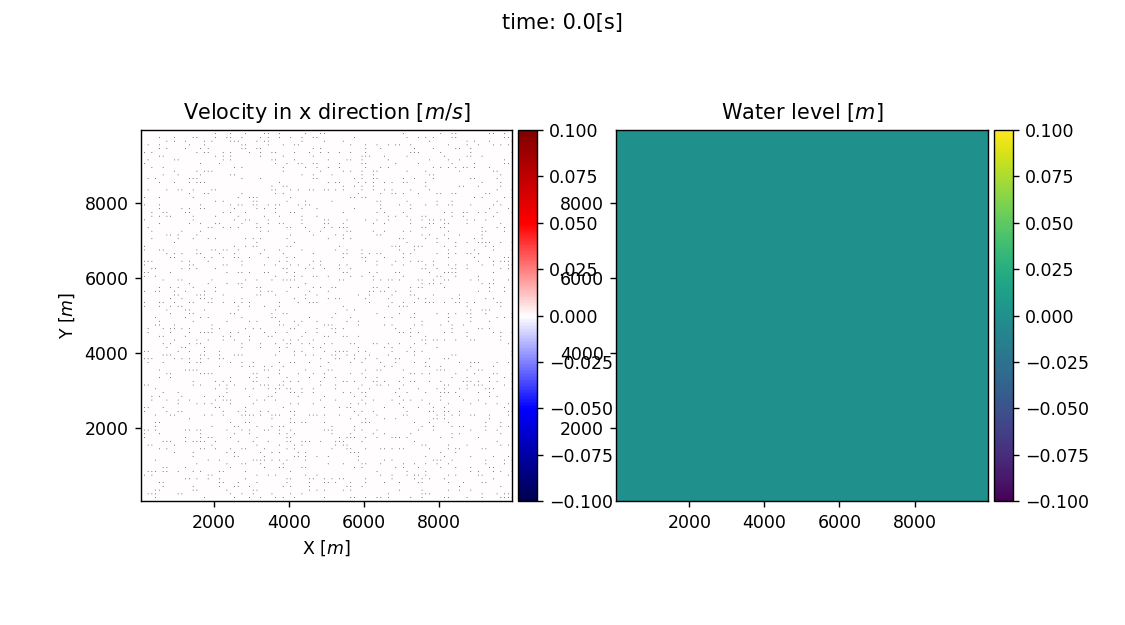

In [12]:
# set plot size
plt.rcParams["figure.figsize"] = (9, 5) # (w, h)

# link functions to widgets
run.on_click(run_model)
update.on_click(update_model)
restart.on_click(restart_model)

def set_plot(change):
    minU = data[-1]["top_ucx"].min()
    maxU = data[-1]["top_ucx"].max()
    minS = data[-1]["top_s1"].min()
    maxS = data[-1]["top_s1"].max()
    
#     print(maxV, minV)
    ux_top.set_clim(vmin= -round(1.2 *  max(abs(minU), abs(maxU)), 2), vmax=round(1.2 *  max(abs(minU), abs(maxU)), 2))
    s1_top.set_clim(vmin= -round(1.2 *  max(abs(minS), abs(maxS)), 2), vmax=round(1.2 *  max(abs(minS), abs(maxS)), 2))

    t = change['new']
    if (t < len(data)):
        ux_top.set_data(data[t]["top_ucx"])
        s1_top.set_data(data[t]["top_s1"])
        t1.set_text("time: " + str(data[t]["time"]) + "[s]")
        quiver.set_UVC(data[t]["ucx"][randind], data[t]["ucy"][randind])
        fig.canvas.draw()
        
slider.observe(set_plot, 'value')

controls = HBox([run, update, restart])
params = VBox(items)

for i in items: 
    change_param(i)
    i.observe(change_param, names='value')

display(VBox([settings, HBox([nsteps, controls]), HBox([params])]))
fig,(ax0, ax1) = plt.subplots(1, 2)
display(player)

t1 = fig.suptitle("time: " + str(data[0]["time"]) + "[s]")

ux_top = ax0.imshow(data[0]["top_ucx"], extent=[xz.min(), xz.max(), yz.min(), yz.max()], cmap="seismic")
ax0.set_xlabel("X $[m]$")
ax0.set_ylabel("Y $[m]$")
# quiver = ax0.quiver(xz[randind], yz[randind], data[0]["ucx"][randind], data[0]["ucy"][randind], angles='xy', scale_units='xy', scale=0.0000001)
quiver = ax0.quiver(xz[randind], yz[randind], data[0]["ucx"][randind], data[0]["ucy"][randind], angles='xy', scale_units='xy', scale=0.0001)
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(ux_top, cax=cax0);
ax0.set_title('Velocity in x direction $[m/s]$')


s1_top = ax1.imshow(data[0]["top_s1"], extent=[xz.min(), xz.max(), yz.min(), yz.max()])
ax1.set_title('Water level $[m]$')
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cbar1 = plt.colorbar(s1_top, cax=cax1);
plt.draw()


In [13]:
print(wrapper.get_var('wx'))

[15. 15. 15. ... 15. 15. 15.]
